# Import Library Yang Dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('fifa_eda_stats.csv')
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

# Subset feature dan targetnya

In [6]:
X = df.iloc[:,:-1] # Target
y = df.iloc[:,-1] # Feature

# Bagi dataset menjadi Training Set dan Testing Set proporsi 70:30

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [8]:
print("Dimensi X_train: ", X_train.shape)
print("Dimensi X_test: ", X_test.shape)
print("Dimensi y_train: ", y_train.shape)
print("Dimensi y_test: ", y_test.shape)

Dimensi X_train:  (12744, 56)
Dimensi X_test:  (5463, 56)
Dimensi y_train:  (12744,)
Dimensi y_test:  (5463,)


# Melakukan normalisasi data pada salah satu attribute,dengan menggunakan Min Max scaler (buatlah copy dataset terlebih dahulu)

In [9]:
dfClone = pd.read_csv('fifa_eda_stats.csv')

In [10]:
mms = MinMaxScaler()

In [11]:
x_scaled = mms.fit_transform(dfClone[["Overall","Potential","International Reputation"]])

In [12]:
dfClone.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


# Normalilasi dengan metode Z-Score

In [13]:
dfClone["Overall"] = dfClone["Overall"] / dfClone["Overall"].std()
dfClone["Potential"] = dfClone["Potential"] / dfClone["Potential"].std()

In [14]:
dfClone.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,13.605581,15.318189,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,13.605581,15.318189,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,13.316100,15.155230,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,13.171360,15.155230,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,13.171360,14.992270,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Lakukan standarisasi pada dataset (buatlah copy dataset terlebih dahulu)

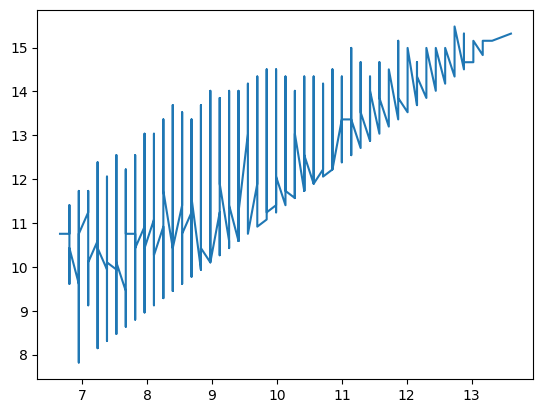

In [22]:
plt.plot(dfClone.Overall, dfClone.Potential)
plt.show()

In [23]:
ss = StandardScaler()

In [24]:
x_skala = ss.fit_transform(dfClone[["Overall","Potential"]])

In [25]:
data_standardisasi = pd.DataFrame(x_skala)

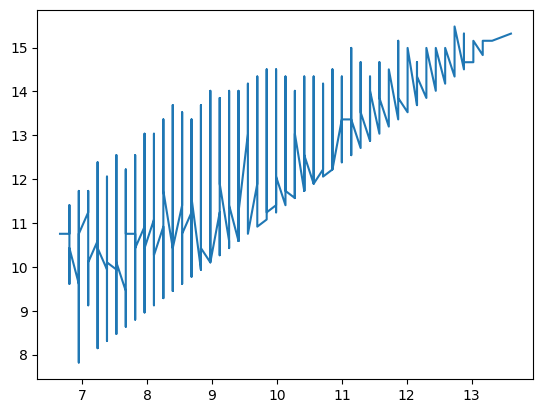

In [26]:
plt.plot(dfClone.Overall, dfClone.Potential)
plt.show()

# Lakukan Data cleaning pada data dengan nilai null (jika tidak ada nilai null pada dataset, maka buatlah menjadi ada). Ganti nilai null sesuai ketentuan. (bilangan bulat : median/modus, bilangan desimal : mean, tulisan : modus). Nilai plus jika strategy yang digunakan menggunakan 3 nilai

In [27]:
print("Data sebelum dicleaning :")
df.isna().sum()

Data sebelum dicleaning :


ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

In [28]:
imputer = SimpleImputer(strategy="mean")
imputerString = SimpleImputer(strategy="most_frequent")

In [29]:
df['Club'] = imputerString.fit_transform(df[['Club']])

In [30]:
df['Position'] = imputerString.fit_transform(df[['Position']])

In [31]:
print("Data setelah dicleaning :")
df.isna().sum()

Data setelah dicleaning :


ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                            0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                        0
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

# Lakukan Data cleaning pada data dengan nilai duplikat. (Jika tidak ada nilai duplikat pada dataset, maka buatlah menjadi ada)

In [33]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18202    False
18203    False
18204    False
18205    False
18206    False
Length: 18207, dtype: bool

In [34]:
df[df.duplicated()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df[df.duplicated()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [37]:
df.duplicated().sum()

0

In [38]:
df.duplicated().any()

False

# Ganti tipe data salah satu attribute angka

In [39]:
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   

In [42]:
encoder = OrdinalEncoder()
df['OverallEncoded'] = encoder.fit_transform(df[['Overall']])

In [43]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,CrossingEncoded,OverallEncoded
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,79.0,47.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,79.0,47.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,74.0,46.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,12.0,45.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,88.0,45.0


# Lakukan one hot encoding pada dataset

In [44]:
encoderHot = OneHotEncoder(sparse=False)

In [45]:
yearEnc = encoder.fit_transform(df[['Overall']])

In [46]:
yearHotEnc = pd.DataFrame(yearEnc)

In [47]:
df = df.join(yearHotEnc)

In [48]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,CrossingEncoded,OverallEncoded,0
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,79.0,47.0,47.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,79.0,47.0,47.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,74.0,46.0,46.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,12.0,45.0,45.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,88.0,45.0,45.0
